# Simple linear regression

***

### What is simple linear regression?

Regression is one of the most important fields in statistics and machine learning. It is a statistical method which attempts to determine the strength and character of the relationship between one dependent variable and a series of other independent variables.<SUP>2</SUP> It allows the relationship to be modelled mathematically to find trends in a data set.<SUP>3</SUP>  The overall idea of regression is to examine two things:

1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they impact the outcome variable?

There are many regression methods available, with linear regression being one of the most important and widely used type of predictive analysis.<SUP>4</SUP> <SUP>5</SUP> Simple linear regression, or single-variate linear regression, concerns two-dimensional sample points with one independent variable and one dependent variable, and finds a linear function (i.e a straight line) that predicts the dependent variable values as a function of the independent variable as accurately as possible.<SUP>1</SUP> The goal of simple linear regression is to create a linear model that minimises the sum of squares of the residuals/error.

![Simple Linear Regression](simple_linear_reg.PNG)

It makes certain assumptions about the data:<SUP>6</SUP>

1. **Homogeneity of variance:** the size of the error in the prediction does not change significantly across the values of the independent variable.
2. **Independence of observations:** the observations in the data set were collected using statistically valid sampling methods.
3. **Normality:** the data follows a normal distribution.
4. **Linear relationship:** the line of best fit through the data points is a straight line

The general form of simple linear regression is $Y = a + bX$, where $X$ is the explanatory variable (the variable used to predict $Y$) and $Y$ is the dependent variable (the variable being predicted). The slope of the line is $b$ and $a$ is the intercept.<SUP>7</SUP>

In [36]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.model_selection as mod
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Apply a plot style
plt.style.use("ggplot")

In [2]:
# Read the dataset
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


We can see that the data set comprises two columns, *wind* and *power*.

In [3]:
# Examine various statistical data about the data set
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Plot the distribution of the wind speed data

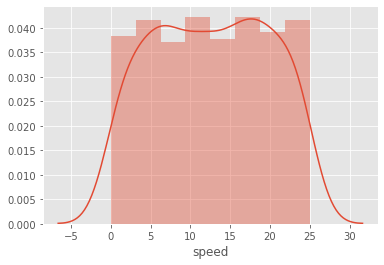

In [4]:
sns.distplot(df["speed"], kde=True);

Plot the distribution of power

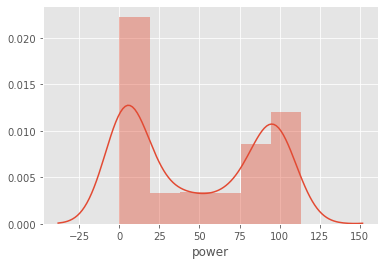

In [5]:
sns.distplot(df["power"], kde=True);

Train the data

In [6]:
train = df[:(int((len(df)*0.8)))]
test = df[(int((len(df)*0.8))):]

print("Training data: ", train.shape)
print("Testing data: ", test.shape)
print("Total Data: ", dfwind.shape)

Training data:  (400, 2)
Testing data:  (100, 2)
Total Data:  (500, 2)


In [18]:
regr = linear_model.LinearRegression()

train_x = np.array(train[["speed"]])
train_y = np.array(train[["power"]])

regr.fit(train_x, train_y)

slope = regr.coef_[0][0]
intercept = regr.intercept_[0]

print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  6.002515399882904
Intercept:  -22.550828482729884


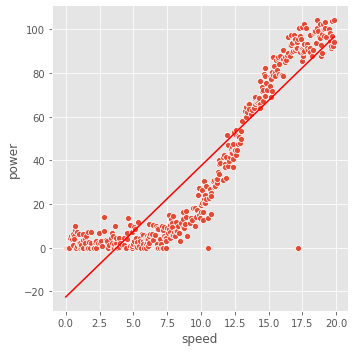

In [19]:
sns.relplot(x="speed", y="power", data=train);
plt.plot(train["speed"], slope*train["speed"] + intercept, '-r')

Estimate power output

In [20]:
def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [22]:
speed_val = 10

estimated_power = get_regression_predictions(speed_val, intercept, slope)

print(estimated_power)

37.47432551609916


Test how well the model has performed

In [75]:
def residual_sum_of_squares(input_feature, output, intercept, slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RSS = (residual*residual).sum()
    
    return (RSS)

def R_Squared(input_feature, output, intercept, slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    RES = (residual*residual).sum()
    
    REST = output - output.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)

def Mean_Absolute_Error(input_feature, output, intercept, slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    var = (Yi - prediction).abs().sum()
    MAE = var/len(Yi)
    return MAE
    
def Mean_Square_Error(input_feature, output, intercept, slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    var = ((Yi - prediction)*(Yi - prediction)).sum()
    MSE = var/len(Yi)
    return MSE

def Mean_Absolute_Percentage_Error(input_feature, output, intercept, slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    var = ((Yi - prediction)/Yi).abs().sum()
    MAPE = var/len(Yi) *100
    return MAPE    

def Mean_Percentage_Error(input_feature, output, intercept, slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    var = ((Yi - prediction)/Yi).sum()
    MPE = var/len(Yi) *100
    return MPE

In [76]:
print(residual_sum_of_squares(test["power"], test["speed"], intercept, slope))
print(R_Squared(test["power"], test["speed"], intercept, slope))
print(Mean_Absolute_Error(test["power"], test["speed"], intercept, slope))
print(Mean_Square_Error(test["power"], test["speed"], intercept, slope))
print(Mean_Absolute_Percentage_Error(test["power"], test["speed"], intercept, slope))
print(Mean_Percentage_Error(test["power"], test["speed"], intercept, slope))

26965925.260606594
-121182.30901812775
491.84984774170806
269659.25260606594
2213.720256457386
-2167.2872329588495


Other types of regression

Polynomial 
Quantile
Partial Least Squares

### Polynomial Regression

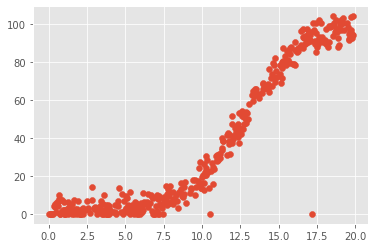

In [64]:
x = train_x.reshape((-1, 1))
y = train_y

plt.scatter(x, y)

In [68]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [69]:
print(x_)

[[0.00000000e+00 0.00000000e+00]
 [1.25000000e-01 1.56250000e-02]
 [1.50000000e-01 2.25000000e-02]
 [2.25000000e-01 5.06250000e-02]
 [2.75000000e-01 7.56250000e-02]
 [3.25000000e-01 1.05625000e-01]
 [4.00000000e-01 1.60000000e-01]
 [4.50000000e-01 2.02500000e-01]
 [5.01000000e-01 2.51001000e-01]
 [5.26000000e-01 2.76676000e-01]
 [5.51000000e-01 3.03601000e-01]
 [5.76000000e-01 3.31776000e-01]
 [6.26000000e-01 3.91876000e-01]
 [6.76000000e-01 4.56976000e-01]
 [7.01000000e-01 4.91401000e-01]
 [7.26000000e-01 5.27076000e-01]
 [7.51000000e-01 5.64001000e-01]
 [8.01000000e-01 6.41601000e-01]
 [8.26000000e-01 6.82276000e-01]
 [8.51000000e-01 7.24201000e-01]
 [9.26000000e-01 8.57476000e-01]
 [9.51000000e-01 9.04401000e-01]
 [9.76000000e-01 9.52576000e-01]
 [1.00100000e+00 1.00200100e+00]
 [1.02600000e+00 1.05267600e+00]
 [1.05100000e+00 1.10460100e+00]
 [1.07600000e+00 1.15777600e+00]
 [1.10100000e+00 1.21220100e+00]
 [1.15100000e+00 1.32480100e+00]
 [1.25100000e+00 1.56500100e+00]
 [1.276000

In [71]:
model = LinearRegression().fit(x_,y)

r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.9364295758671661
intercept: [-0.39244879]
coefficients: [[-0.64671867  0.33144278]]


<br>

### References

***
1. Wikipedia, *Simple linear regression* [online] Available at: https://en.wikipedia.org/wiki/Simple_linear_regression

2. Investopedia, *Regression Definition* [online] Available at: https://www.investopedia.com/terms/r/regression.asp

3. Statistics How To, *Regression Analysis: Step by Step Articles, Videos, Simple Definitions* [online] Available at: https://www.statisticshowto.com/probability-and-statistics/regression-analysis/ 

4. Statistics Solutions, *What is Linear Regression?* [online] Available at: https://www.statisticssolutions.com/what-is-linear-regression/

5. Real Python, *Linear Regression in Python* [online] Available at: https://realpython.com/linear-regression-in-python/

6. Scribbr, *An introduction to simple linear regression* [online] Available at: https://www.scribbr.com/statistics/simple-linear-regression/

7. Yale University Department of Statistics and Data Science, *Linear Regression* [online] Available at: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

Ref: Simple linear regression implementation: https://medium.com/@shuklapratik22/simple-linear-regression-implementation-from-scratch-cb4a478c42bc